In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
events = np.loadtxt("../data_processed/events_refact_shapes_translation01.txt")

# time difference between the filtered events

Here the motion is assumed to be in 1D and always moving to the left (camera moves to the right)

In [78]:
shape = (180, 240)

In [79]:
last_time = np.zeros(shape)
time_difference = np.zeros(shape)
for e in events:
    if e[3] == 1:
        continue
    
    x = int(e[1])
    y = int(e[2])
    
    last_time[y, x] = e[0]
    
    if x == shape[1] -1:
        continue
    
    if last_time[y, x+1] != 0:
        time_difference[y, x] = e[0] - last_time[y, x+1]

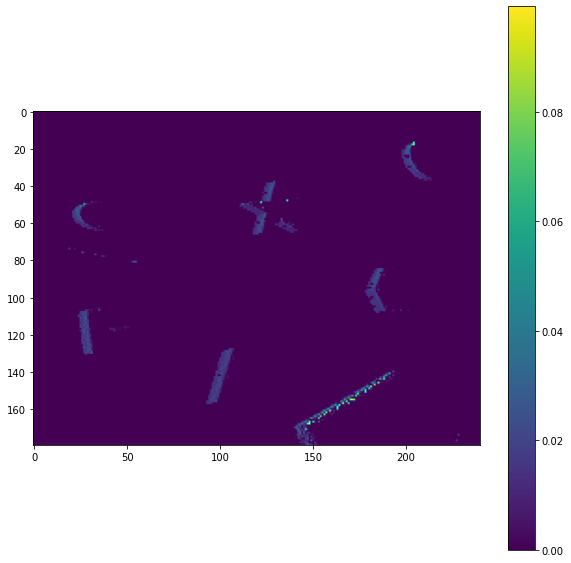

In [80]:
plt.figure(figsize=(10, 10))
m = plt.imshow(time_difference)
plt.colorbar(mappable=m)

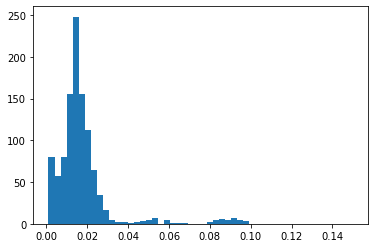

In [81]:
plt.hist(time_difference.flatten(), 50, range=(0.001, 0.15));

In [82]:
np.var(time_difference)

1.3292159421337989e-05

# time difference after convolution

In [83]:
conv_shape = (2, 2)
conv_stride = (2, 2)
thresh = 0.66
result_shape = (int(shape[0]/conv_stride[0]), int(shape[1]/conv_stride[1]))
conv_acc = np.zeros(result_shape)
event_conv = []
for e in events:
    if e[3] == 1:
        continue
    
    x = int(e[1] / conv_stride[0])
    y = int(e[2] / conv_stride[1])
    
    conv_acc[y, x] += 1
    
    if conv_acc[y, x] >= conv_shape[0]*conv_shape[1] * thresh:
        event_conv.append([e[0], x, y, e[3]])

In [84]:
event_conv = np.array(event_conv)
event_conv.shape

(613, 4)

In [85]:
last_time = np.zeros(result_shape)
time_difference = np.zeros(result_shape)
for e in event_conv:
    if e[3] == 1:
        continue
            
    x = int(e[1])
    y = int(e[2])
    
    last_time[y, x] = e[0]
    
    if x == shape[1] -1:
        continue
    
    if last_time[y, x+1] != 0:
        time_difference[y, x] = e[0] - last_time[y, x+1]

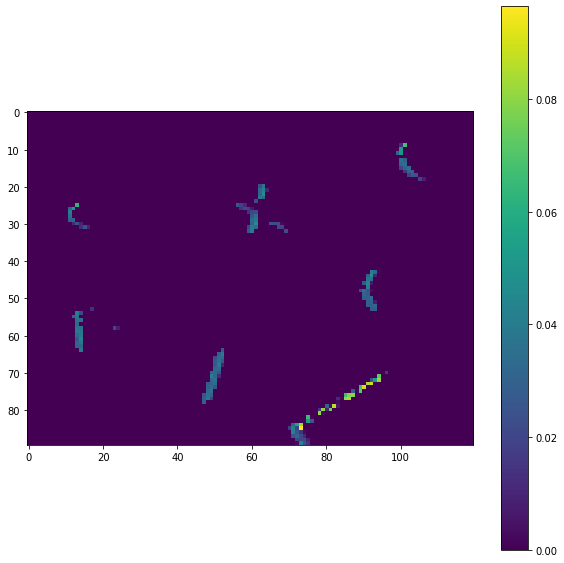

In [86]:
plt.figure(figsize=(10, 10))
m = plt.imshow(time_difference)
plt.colorbar(mappable=m)

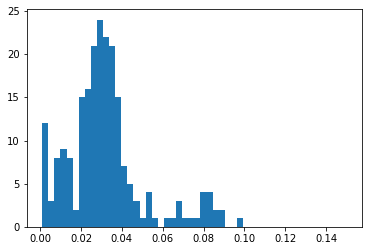

In [87]:
plt.hist(time_difference.flatten(), 50, range=(0.001, 0.15));

In [88]:
np.var(time_difference)

2.7485220224879418e-05

# average time difference in patches

In [103]:
last_time = np.zeros(shape)
time_difference = np.zeros(shape)
for e in events:
    if e[3] == 1:
        continue
    
    x = int(e[1])
    y = int(e[2])
    
    last_time[y, x] = e[0]
    
    if x == shape[1] -1:
        continue
    
    if last_time[y, x+1] != 0:
        time_difference[y, x] = e[0] - last_time[y, x+1]

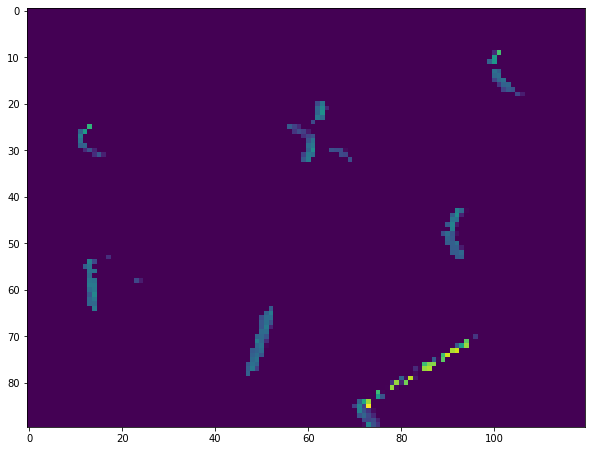

In [208]:
plt.figure(figsize=(10, 10))
plt.imshow(time_difference)

In [111]:
conv_shape = (2, 2)
conv_stride = (2, 2)
result_shape = (int(shape[0]/conv_stride[0]), int(shape[1]/conv_stride[1]))
conv_acc = np.zeros(result_shape)
conv_sum = np.zeros(result_shape)
for x in range(time_difference.shape[1]):
    for y in range(time_difference.shape[0]):
        if time_difference[y, x] == 0:
            continue

        x_c = int(x / conv_stride[0])
        y_c = int(y / conv_stride[1])

        conv_acc[y_c, x_c] += 1
        conv_sum[y_c, x_c] += time_difference[y, x]

In [112]:
time_diff_avg = np.divide(conv_sum, conv_acc, where=conv_acc!=0)

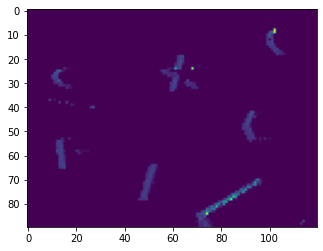

In [113]:
plt.imshow(time_diff_avg)

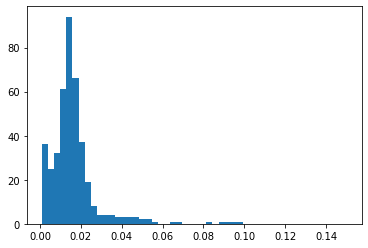

In [114]:
plt.hist(time_diff_avg.flatten(), 50, range=(0.001, 0.15));

In [115]:
np.var(time_diff_avg.flatten())

1.6291169278241476e-05

# Median time difference

In [185]:
last_time = np.zeros(shape)
time_difference = np.zeros(shape)
for e in events:
    if e[3] == 1:
        continue
    
    x = int(e[1])
    y = int(e[2])
    
    last_time[y, x] = e[0]
    
    if x == shape[1] -1:
        continue
    
    if last_time[y, x+1] != 0:
        time_difference[y, x] = e[0] - last_time[y, x+1]

In [196]:
conv_shape = (3, 3)
conv_stride = (3, 3)
result_shape = (int(shape[0]/conv_stride[0]), int(shape[1]/conv_stride[1]))
dict_px = {} 
for x in range(time_difference.shape[1]):
    for y in range(time_difference.shape[0]):
        if time_difference[y, x] == 0:
            continue

        x_c = int(x / conv_stride[0])
        y_c = int(y / conv_stride[1])

        if (y_c, x_c) in dict_px:
            dict_px[y_c, x_c].append(time_difference[y, x])
        else:
            dict_px[y_c, x_c] = [time_difference[y, x]]

In [197]:
time_diff_med = np.zeros(result_shape)
for k in dict_px:
    y = k[0]
    x = k[1]
    if len(dict_px[k]) <= 2:
        continue
    time_diff_med[y, x] = np.median(dict_px[k])

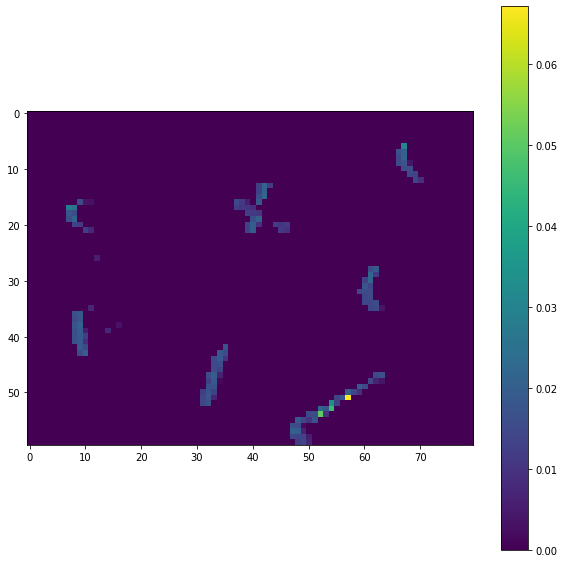

In [198]:
plt.figure(figsize=(10, 10))
m = plt.imshow(time_diff_med)
plt.colorbar(mappable=m)

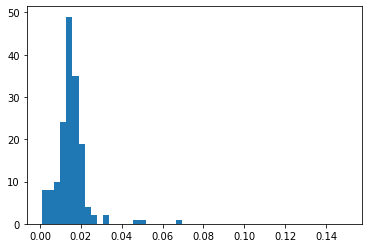

In [199]:
plt.hist(time_diff_med.flatten(), 50, range=(0.001, 0.15));

In [200]:
np.var(time_diff_med.flatten())

9.638127479354348e-06

# median after conv

In [201]:
conv_shape = (2, 2)
conv_stride = (2, 2)
thresh = 0.66
result_shape = (int(shape[0]/conv_stride[0]), int(shape[1]/conv_stride[1]))
conv_acc = np.zeros(result_shape)
event_conv = []
for e in events:
    if e[3] == 1:
        continue
    
    x = int(e[1] / conv_stride[0])
    y = int(e[2] / conv_stride[1])
    
    conv_acc[y, x] += 1
    
    if conv_acc[y, x] >= conv_shape[0]*conv_shape[1] * thresh:
        event_conv.append([e[0], x, y, e[3]])
        
event_conv = np.array(event_conv)

In [202]:
last_time = np.zeros(result_shape)
time_difference = np.zeros(result_shape)
for e in event_conv:
    if e[3] == 1:
        continue
            
    x = int(e[1])
    y = int(e[2])
    
    last_time[y, x] = e[0]
    
    if x == shape[1] -1:
        continue
    
    if last_time[y, x+1] != 0:
        time_difference[y, x] = e[0] - last_time[y, x+1]

In [203]:
conv_shape = (3, 3)
conv_stride = (3, 3)
result_shape = (int(result_shape[0]/conv_stride[0]), int(result_shape[1]/conv_stride[1]))
dict_px = {} 
for x in range(time_difference.shape[1]):
    for y in range(time_difference.shape[0]):
        if time_difference[y, x] == 0:
            continue

        x_c = int(x / conv_stride[0])
        y_c = int(y / conv_stride[1])

        if (y_c, x_c) in dict_px:
            dict_px[y_c, x_c].append(time_difference[y, x])
        else:
            dict_px[y_c, x_c] = [time_difference[y, x]]

In [204]:
time_diff_med = np.zeros(result_shape)
for k in dict_px:
    y = k[0]
    x = k[1]
    if len(dict_px[k]) <= 2:
        continue
    time_diff_med[y, x] = np.median(dict_px[k])

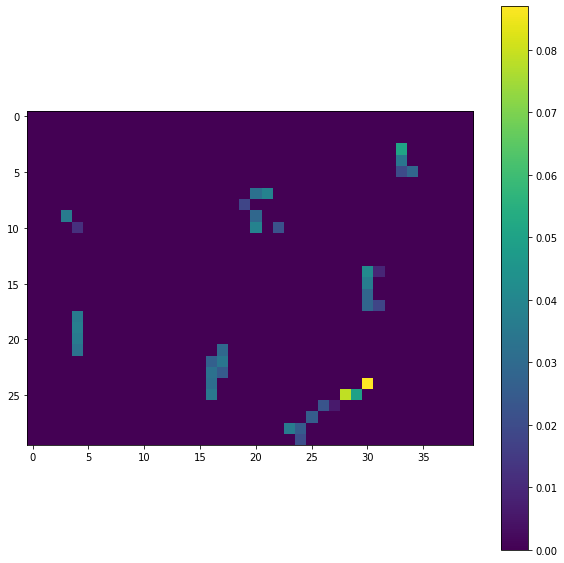

In [205]:
plt.figure(figsize=(10, 10))
m = plt.imshow(time_diff_med)
plt.colorbar(mappable=m)

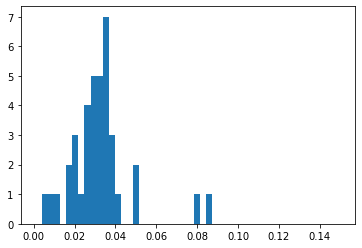

In [206]:
plt.hist(time_diff_med.flatten(), 50, range=(0.001, 0.15));

In [207]:
np.var(time_diff_med.flatten())

3.936449736387272e-05